In [16]:
import numpy as np
import matplotlib.pyplot as plt
from utility import*
%matplotlib inline


In [17]:

#  find_closest_centroids

def find_closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0], dtype=int)

    # Loop over each example in X
    for i in range(X.shape[0]):
        # Calculate the Euclidean distance between the current example and all centroids
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        
        # Find the index of the closest centroid
        idx[i] = np.argmin(distances)
    
    return idx

In [18]:
# compute_centroids

def compute_centroids(X, idx, K):
   
    # Useful variables
    m, n = X.shape

    centroids = np.zeros((K, n))
    
     # Loop over each centroid
    for k in range(K):
        # Find indices of examples assigned to centroid k
        indices = (idx == k)
        
        # Calculate the mean of the data points assigned to centroid k
        centroids[k] = np.mean(X[indices], axis=0)

    
    return centroids

In [19]:

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
       
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx


In [20]:

def kMeans_init_centroids(X, K):
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

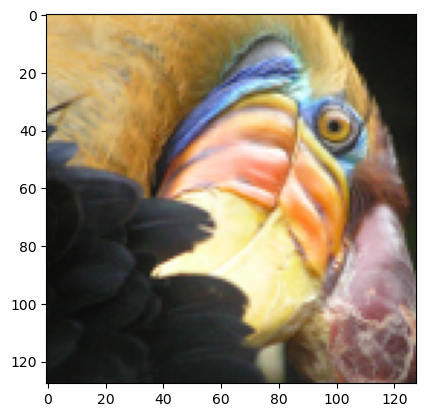

In [34]:
original_img = plt.imread('bird_small.png')
plt.imshow(original_img)


In [35]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [37]:

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [38]:
print(X_img.shape)

(16384, 3)


In [24]:
# run K-means for given values of K and max_iters here
K = 16
max_iters = 10


initial_centroids = kMeans_init_centroids(X_img, K)


centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [25]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [2 2 2 2 2]


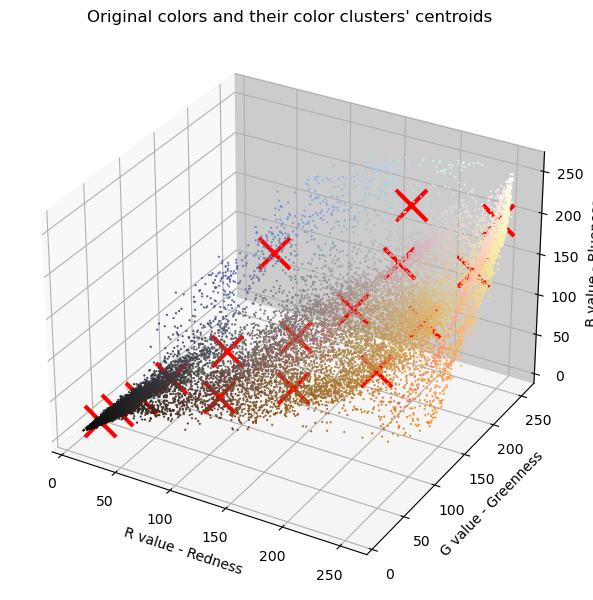

In [26]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

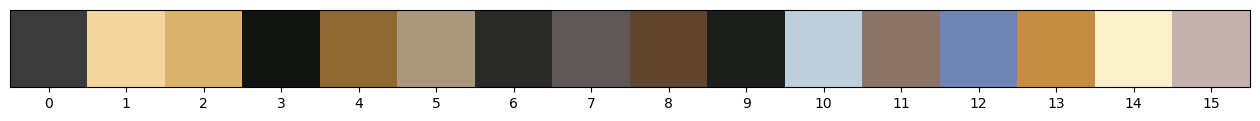

In [27]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [28]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

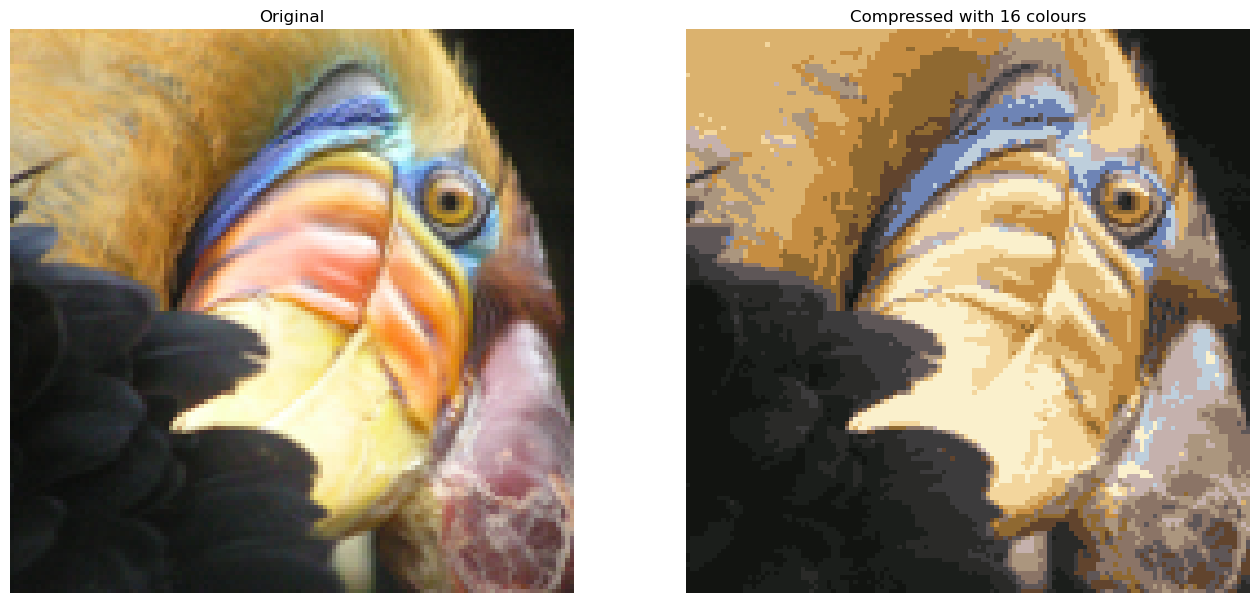

In [29]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()